In [1]:
%matplotlib notebook

import cv2
import pytesseract
import pandas as pd
import os
import matplotlib.pyplot as plt
import itertools

pytesseract.get_tesseract_version()

LooseVersion ('4.0.0.20181030')

## First test

In [2]:
screenshot_dir = r'C:\Users\Robin\AppData\Roaming\.minecraft\screenshots'
tessdata_dir = 'C:\Program Files (x86)\Tesseract-OCR\tessdata'

In [3]:
img_name = r'2019-08-04_09.15.26.png'

In [4]:
img = cv2.imread(os.path.join(screenshot_dir, img_name))
print(img.shape)

(1080, 1920, 3)


<IPython.core.display.Javascript object>


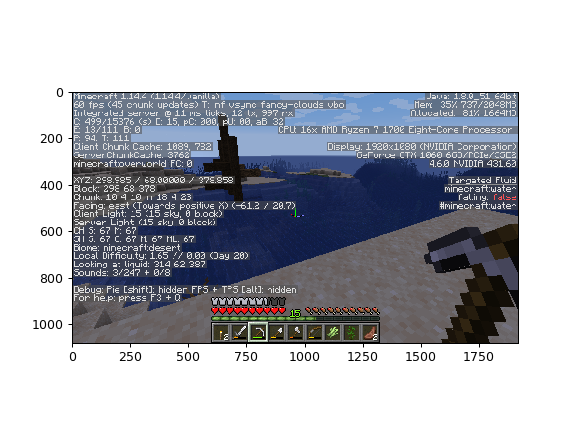

In [5]:
# OpenCV represents RGB images as multi-dimensional NumPy arrays…but in reverse order!

fig, ax = plt.subplots()
im = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
def get_string(img, params = r'--psm 11'):
    if params is not None:
        string = pytesseract.image_to_string(img, config = params)
    else:
        string = pytesseract.image_to_string(img)
    return string

In [7]:
string = get_string(img)
print(string)

Mimnecraft 1,144 1 1499 vanillas

Jdava: 1268 51 &4dbit

&l fps (45 chunk updates? T inf wsunc fancy—-clouds wbo

Mem: 235 737 2892ME

Integrated server @ 11 Ms ticks, 12 tx, 99'? I

Allozated: 21X 16&4M6

(I == T i oy = g e

E

E: 13,111 E: @

0 I o e = Ol 1

ht—Core Frocessor

(=L R

Client Chunk Cache: 1889, 722

Dizpla

192818868 (HYIDIA Corporation?

ServerChunkCache: 3762

OefForce 0T 1868 606/FCIa S5E2

minecrattoverworld FC: &

G I P R T

= = R Ly = 6 11 [ R i = R = bt

Block: 292 &

Chunk: 18 4 18 in 18 4 23

falling

Facing: east (Towards positive @) (-61.2 £ 28,72

U =T S MR T

Client Light: 15 15 =sky, 8 bloc

=

Server Light: 15 =ky, 8 blocks

CH I &% M

] O A O A o O = o | B

Biome: minecraftdesert

[T BT o Tt O I R = 1 R TN

Looking at Lliguid: 2149 &

Sounds: 352497 + 858

Oebug: Fie [shiftl: hidden FFS + TFS [altl hidden

For help: press F3 +

I

g e ey i ey oy e T T

) g Sy g iy ey

PEEE


Not a great conversion accuracy. Try some image processing to see if we can make it easier.

## Improvements

First, try re-sizing and converting to greyscale

In [8]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

<IPython.core.display.Javascript object>


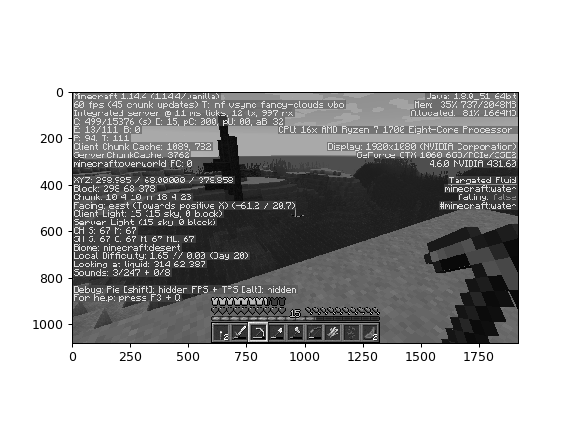

In [9]:
fig, ax = plt.subplots()
im = plt.imshow(grey_img, cmap='gray')
plt.show()

In [10]:
string_grey = get_string(grey_img)
print(string_grey)

Mimnecraft 1,144 1 1499 vanillas

Jdava: 12851 &dbit

&l fps (45 chunk updates? T: inf wsunc fancy—-clouds wbo

Mem: 235 737 2892ME

Integrated server @ 11 Ms ticks, 12 tx, 99'? i

Allozated: 214 16&4ME

(I == T i oy = g e

E

E:13/111 E: @

0 I O e = Ol 1

ht—Core Frocessor

(=L R

Client Chunk Cache: 1889, 7282

Oizpla

192818868 (HYIDIA Corporation?

ServerChunkCache: 3762

OefForce 0T 1868 606/FCIa S5E2

minectattoverworld FC: @

G P R T

R = A Ly = 6 11 [ R i = R = bt

Block: 292 &

Chumk: 18 4 18 in 18 4 23

falling: fal==

Facing: east (Towards positive @) (-61.2 £ 28,72

U=l S e MR T

Client Light: 15 15 =sky, 8 bloc

Server Light: 15 =ky, 8 blocks

CH I &% M

] O A O A o = o | B

Biome: minecraftdesert

[T BT o Tt O R I i 0 1 R TN B

Looking at Lliguid: 2149 &

Sounds: 352497 + 858

Oebug: Fie [shiftl: hidden FFS + TFS [altl hidden

For help: press F3 +

Tl Y

e e e T T

)y Sy gy ey

TR ;5

e

-


Maybe worse... :(

In [11]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_LINEAR):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [12]:
med_img = image_resize(img, height = 720)
med_img.shape

(720, 1280, 3)

<IPython.core.display.Javascript object>


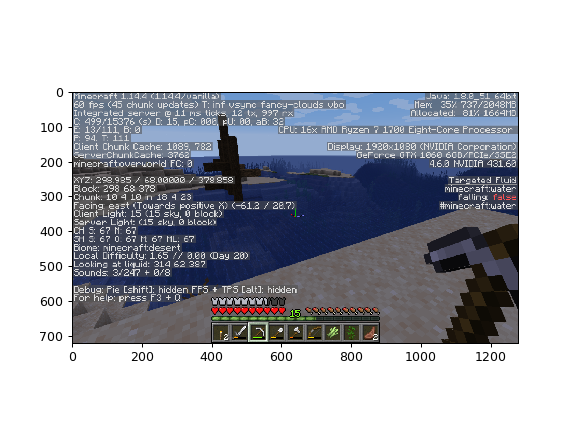

In [13]:
fig, ax = plt.subplots()
im = plt.imshow(cv2.cvtColor(med_img, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
string_med = get_string(med_img)
print(string_med)

Minectaft 1.14.4 (1144 vanillad

R= X - T

I"Iem T il T T

S8 fips (453 chunk updates) T: inf vsunc fancu—clouds wbo

Allocated: 217 1664ME

Integrated server @ 11 i ticks, .1.2 L 99 R

T ki ey i N )

-

=]

CFL: 16: AMD Fuzen 7 17608 Ei

ht—Core Frocessor

AN EN

SRR

Client Chunk Cache: 1823, 722

([

SeruverChunkCache: 276

lay: 19201888 (HVIDIA Corporationd

CGeForce OTH 1860 E0B/FCle/33E2

minectaftoverworld FC: @

468 NVIDIA 43168

Fala =it he L =N [ o e i = Re

=ilale il

A

Chunk: 168 4 18.in 12 4 23

#rinecraftuater

fallina:

Facing: east (Towards positive 72 (-61.2 F 26,7

Client Light: 15 {15 sku, 8 bloc

CH =

T T nght 15 sky, 8 block>

SH 5 67 0 £7 It &7 HL: 67

Biome: minecraftdesart

Local Difficulty: 165 4/ 8.68 (Day 282

Sounds: 24247 + 8458

Looking at liguid: 219 &

Debua: Fie [shiftl: hidden FF3 + TFS [altl: hidden

For help: press F2 +

Y

e

LA -1

v


Better!

In [15]:
med_grey_img = image_resize(grey_img, height = 720)
med_grey_img.shape

(720, 1280)

In [16]:
string_medgrey = get_string(med_grey_img)
print(string_medgrey)

468 NVIDIA 43168

mnecr‘amueruorld FC

L

i)

e

e =Rt

PRCrL R

A

Elock: 298 68 |

o

Tallin:

16 4 J.B,m

water

Cliznt

o

hit: 15 15 sky, @ block)

(Towards positive ¥ (-61.2 / 28,7

#rinecra

=

parl = =T

bt (15 =ku, & block)

OH 5: 67 0: 67 I 67 ML: 67

Biome: minecraftdesart

Local Difficulty: 165 /7 8868 (Dag 260

Sounds:

Looking at liguid: 314 &2 387

272497 + B/8

Bﬁbu F’le [=shiftl: hldden I7l7

(=i==

2

*5 Laltd: hidde

SROROOROOR 15 SSSESGRGGS,

7

BEELCERPE


In [17]:
string_medgrey

'468 NVIDIA 43168\n\nmnecr‘amueruorld FC\n\nL\n\ni)\n\ne\n\ne =Rt\n\nPRCrL R\n\nA\n\nElock: 298 68 |\n\no\n\nTallin:\n\n16 4 J.B,m\n\nwater\n\nCliznt\n\no\n\nhit: 15 15 sky, @ block)\n\n(Towards positive ¥ (-61.2 / 28,7\n\n#rinecra\n\n=\n\nparl = =T\n\nbt (15 =ku, & block)\n\nOH 5: 67 0: 67 I 67 ML: 67\n\nBiome: minecraftdesart\n\nLocal Difficulty: 165 /7 8868 (Dag 260\n\nSounds:\n\nLooking at liguid: 314 &2 387\n\n272497 + B/8\n\nBﬁbu F’le [=shiftl: hldden I7l7\n\n(=i==\n\n2\n\n*5 Laltd: hidde\n\nSROROOROOR 15 SSSESGRGGS,\n\n7\n\nBEELCERPE'

Let's get a ground truth to compare performance quatitatively. I created this by hand.

In [18]:
with open('ground_truth.txt', 'r') as file:
    ground_truth = ''
    for line in file:
        ground_truth += line
file.close()
ground_truth

'Minecraft 1.14.4 (1.14.4/vanilla)\nJava: 1.8.0_51 64bit\n60 fps (45 chunk updates) T: inf vsync fancy-clouds vbo\nMem: 35% 737/2048MB\nIntegrated server @11 ms ticks, 12 tx, 997 rx\nAllocated: 81% 1664MB\nC: 499/15376 (s) D: 15, pC: 000, pU: 00, aB:32\nE: 13/111, B: 0\nCPU: 16x AMD Ryzen 7 1700 Eight-Core Processor\nP: 94. T: 111\nClient Chunk Cache: 1089, 782\nDisplay: 1920x1080 (NVIDIA Corporation)\nServerChunkCache: 3762\nGeForce GTX 1060 6GB/PCIe/SSE2\nminecraft:overworld FC: 0\n4.6.0 NVIDIA 431.60\n\nXYZ: 298.985 / 68.00000 / 378.858\nTargeted Fluid\nBlock: 298 68 378\nminecraft:water\nChunk: 10 4 10 in 18 4 23\nfalling: false\nFacing: east (Towards positive X) (-61.2 / 20.7)\n#minecraft:water\nClient Light: 15 (15 sky, 0 block)\nServer Light: (15 sky, 0 block)\nCH S: 67 M: 67\nSH S: 67 O: 67 M: 67 ML: 67\nBiome: minecraft:desert\nLocal Difficulty: 1.65 // 0.00 (Day 20)\nLooking at liquid: 314 62 387\nSounds: 3/247 + 0/8\n\nDebug: Pie [shift]: hidden FPS + TPS [alt]: hidden\nFor 

In [19]:
def get_difference(a,b):

    words=itertools.zip_longest(a,b,fillvalue=None)
    incorrect=len([c for c,d in words if c!=d])
#     print(incorrect)
    return incorrect

In [20]:
get_difference(ground_truth,string_medgrey)

968

great! Let's just start storing these and check for the others:

In [21]:
tests = []
tests.append(string)
tests.append(string_grey)
tests.append(string_med)
tests.append(string_medgrey)

In [22]:
test_strings = pd.Series(tests)

In [23]:
len(ground_truth)

982

In [24]:
def get_accuracy(ground_truth, test):
    return (1 - get_difference(ground_truth, test)/len(ground_truth))

In [25]:
acc = []
for test in tests:
    acc.append(get_accuracy(ground_truth, test))

In [26]:
accuracy = pd.Series(acc)

In [27]:
dataframe = {'Name': ['string', 'string_grey', 'string_med', 'string_medgrey'], 'String': test_strings, 'Accuracy': accuracy}
df = pd.DataFrame(dataframe)

In [28]:
df.head()

,Name,String,Accuracy
0,string,"Mimnecraft 1,144 1 1499 vanillas\n\nJdava: 126...",0.044807
1,string_grey,"Mimnecraft 1,144 1 1499 vanillas\n\nJdava: 128...",0.050916
2,string_med,Minectaft 1.14.4 (1144 vanillad\n\nR= X - T\n\...,0.058045
3,string_medgrey,468 NVIDIA 43168\n\nmnecr‘amueruorld FC\n\nL\n...,0.014257


Hmmm so looking at this what I thought was good qualitatively was maybe worse...let's apply some super basic image processing. I first loaded and played around in ImageJ to quickly prototype some params. The threshold is pretty consistent and wonderfully enough there is a faint grey block surrounding the text so that it never really interferes with the image itself.

In [29]:
thresh_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,thresh_img = cv2.threshold(thresh_img,220,255,cv2.THRESH_BINARY)

In [30]:
thresh_img.shape

(1080, 1920)

<IPython.core.display.Javascript object>


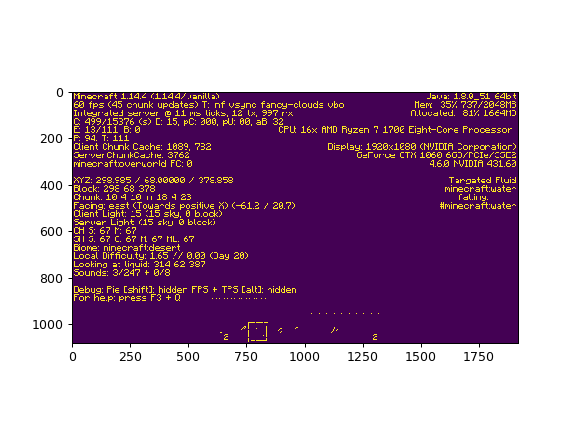

In [31]:
fig, ax = plt.subplots()
im = plt.imshow(thresh_img)
plt.show()

In [41]:
string_thresh = get_string(thresh_img, params = r'--psm 11')
print(string_thresh)

Mimnecraft 1.144 1 1499 vanilla

Java 1.828 51 &dbit

6H fps (45 chunk updates? T: inf vwsunc fancy—-clouds who

Mem: 25 737 2892ME

Integrated server @ 11 m= ticks, 12 tx, 997 rx

Allocated: 21 16&4ME

C: 99913376 =2 In 15, pC: 880, pl: 88, ab: 3

E: 13/111 E: @&

CFL: 16x AMD Fyzen 7 1788 Eight—-Core Frocessor

= RE

Client Chunk Cache: 1889, 722

Oizplag: 1928x1828 CHVIDIA Corporations

ServerChunkCache: 3762

Geforce OTH 1868 &606/FCIe S33E2

minectattoverworld FC: @

d.6.8 MUIDIA 431.68

ATE 292.985 F e2.00880 £ 272.258

Targeted Fluid

Block: 292 &

minecraftuwater

Chunk: 18 4 18 in 12 4 23

falling

Facing: east (Towards positive #) (-61.2 F 28.7

#minecraftwater

Client Light: 15 15 =ky, 8 bloc

Server Light: 15 sky, 8 blocks

[I A

bi BA NT AP = | ER

Biome: minecraftdesert

Local Difficulty; 1.65 44 888 (Day 282

Looking at Lliguid: 2149 &

Sounds: 352497 + 858

Debug: Fie [shiftl: hidden Acs es TFS [alt Ruy

For help: press F323 +

A

Ae

[J—

| a


In [42]:
df = df.append({'Name': 'string_thresh', 'String': string_thresh, 'Accuracy': get_accuracy(ground_truth, string_thresh)}, ignore_index=True)

In [43]:
df

,Name,String,Accuracy
0,string,"Mimnecraft 1,144 1 1499 vanillas\n\nJdava: 126...",0.044807
1,string_grey,"Mimnecraft 1,144 1 1499 vanillas\n\nJdava: 128...",0.050916
2,string_med,Minectaft 1.14.4 (1144 vanillad\n\nR= X - T\n\...,0.058045
3,string_medgrey,468 NVIDIA 43168\n\nmnecr‘amueruorld FC\n\nL\n...,0.014257
4,string_thresh,"Mimnecraft 1,144 1 1499 vanillas\n\nJdava 1828...",0.076375
5,sm_string_thresh,Minecraft 1.14.49 (1.144 vanillayy\n\n-dava 1....,0.051935
6,string_thresh,Mimnecraft 1.144 1 1499 vanilla\n\nJava 1.828 ...,0.069246
